In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filePath = './testAReport/status.json'
with open(filePath, 'r') as f:
    data = json.load(f)

In [ ]:
# Parse the JSON data
records = []
for file_key, file_info in data.get('files', {}).items():
    index = file_info.get('index', {})
    file_path = index.get('file', 'Unknown')
    nums = index.get('nums', {})
    n_statements = nums.get('n_statements', 0)
    n_missing = nums.get('n_missing', 0)
    coverage = ((n_statements - n_missing) / n_statements * 100) if n_statements > 0 else 0
    records.append({
        'file': file_path,
        'n_statements': n_statements,
        'n_missing': n_missing,
        'coverage': coverage
    })

df = pd.DataFrame(records)

In [4]:
df

,file,n_statements,n_missing,coverage
0,algorithms/arrays/delete_nth.py,15,0,100.000000
1,algorithms/arrays/flatten.py,14,0,100.000000
2,algorithms/arrays/garage.py,18,0,100.000000
3,algorithms/arrays/josephus.py,8,0,100.000000
4,algorithms/arrays/limit.py,8,1,87.500000
...,...,...,...,...
326,algorithms/tree/tree.py,5,5,0.000000
327,algorithms/unix/path/full_path.py,3,0,100.000000
328,algorithms/unix/path/join_with_slash.py,6,0,100.000000
329,algorithms/unix/path/simplify_path.py,11,1,90.909091


C:\Users\DELL\AppData\Local\Temp\ipykernel_19828\3734487550.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['coverage'], shade=True, color='blue', clip=(0, 100))


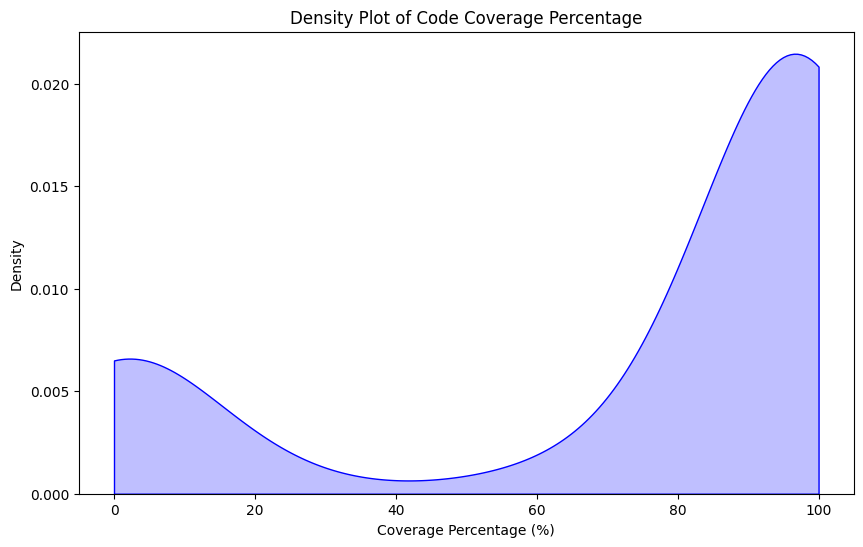

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['coverage'], shade=True, color='blue', clip=(0, 100))
plt.title('Density Plot of Code Coverage Percentage')
plt.xlabel('Coverage Percentage (%)')
plt.ylabel('Density')
plt.show()

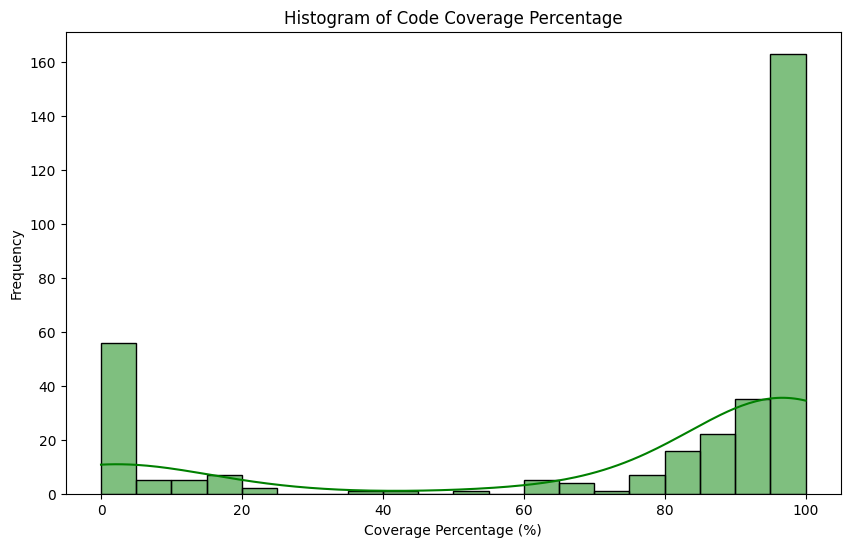

In [6]:
# 2. Histogram of Code Coverage Percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['coverage'], bins=20, kde=True, color='green')
plt.title('Histogram of Code Coverage Percentage')
plt.xlabel('Coverage Percentage (%)')
plt.ylabel('Frequency')
plt.show()

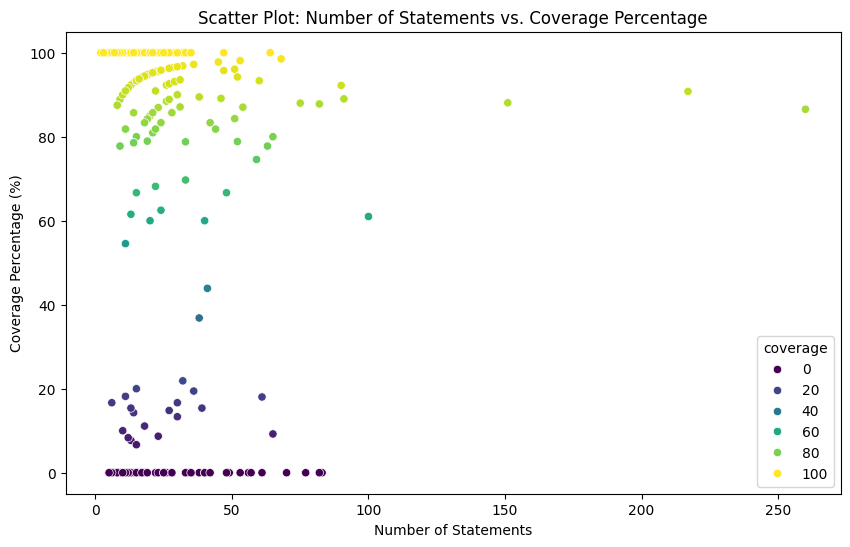

In [7]:
# 3. Scatter Plot: Number of Statements vs. Coverage Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='n_statements', y='coverage', hue='coverage', palette='viridis')
plt.title('Scatter Plot: Number of Statements vs. Coverage Percentage')
plt.xlabel('Number of Statements')
plt.ylabel('Coverage Percentage (%)')
plt.show()